In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [11]:
# Load the dataset
Fish_data = pd.read_csv('/Users/adamdanielgreen/Desktop/Business Statistics/Times Series-20231219/Fish_dataset.csv')
Fish_data['Date'] = pd.to_datetime(Fish_data['start'], format='%d/%m/%Y')

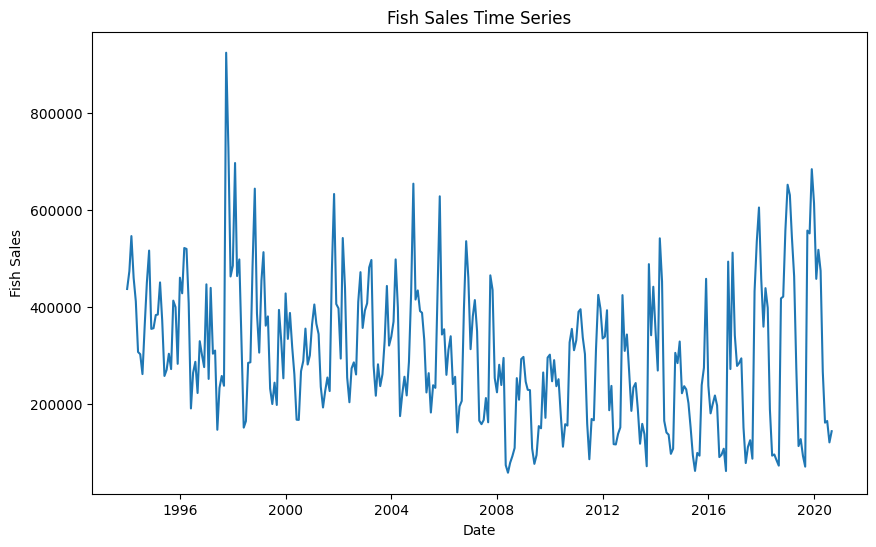

In [12]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(Fish_data['Date'], Fish_data['sales'])
plt.xlabel('Date')
plt.ylabel('Fish Sales')
plt.title('Fish Sales Time Series')
plt.show()

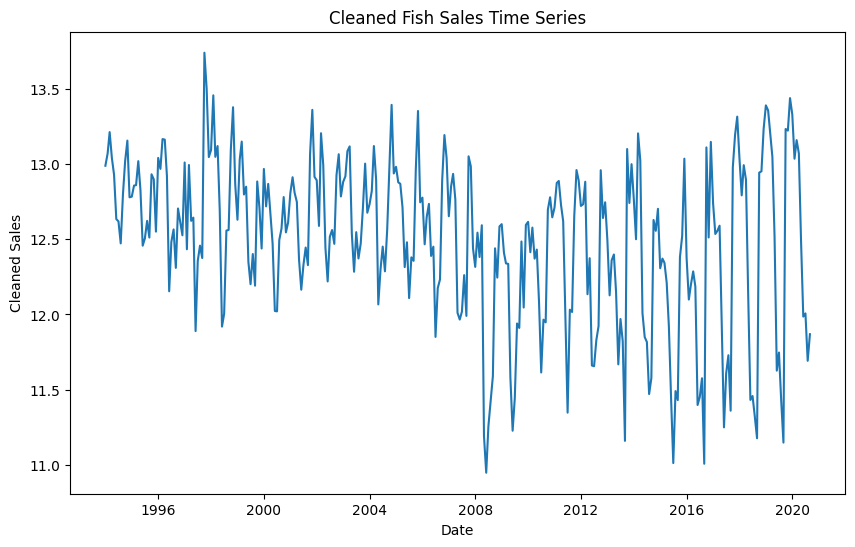

In [13]:

# Create a time series object to store the variable sales
sales_ts = pd.Series(Fish_data['sales'].values, index=Fish_data['Date'])

# Use the function tsclean() to identify and replace outliers.
# We take the log of the time series
clean_sales_ts = np.log(sales_ts)

# Plot the cleaned sales time series
plt.figure(figsize=(10, 6))
plt.plot(clean_sales_ts)
plt.xlabel('Date')
plt.ylabel('Cleaned Sales')
plt.title('Cleaned Fish Sales Time Series')
plt.show()

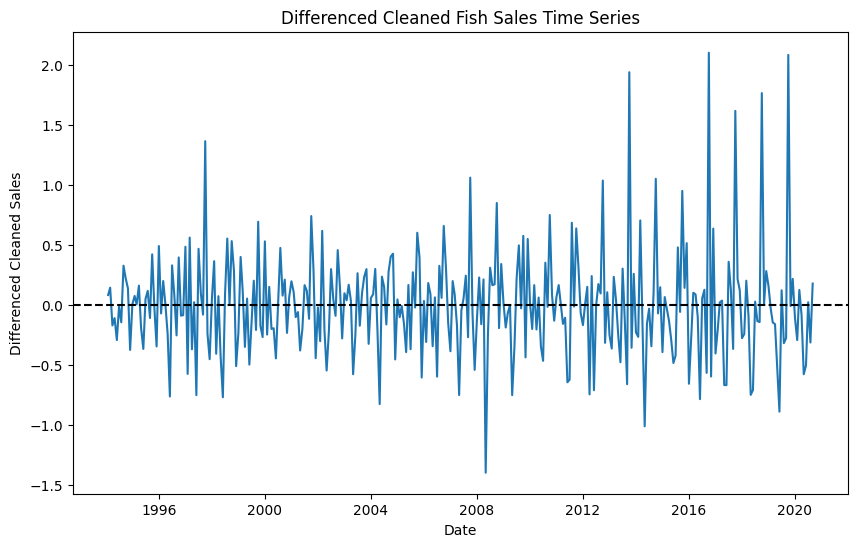

In [14]:
# To apply an ARMA model, the dataset needs to be stationary.
# The diff() function is used to difference once and the result is plotted
diff_clean_sales_ts = clean_sales_ts.diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_clean_sales_ts)
plt.xlabel('Date')
plt.ylabel('Differenced Cleaned Sales')
plt.title('Differenced Cleaned Fish Sales Time Series')
plt.axhline(0, color='black', linestyle='--')
plt.show()

ADF Test Statistic: -5.8561068587763305
p-value: 3.4971005830818084e-07


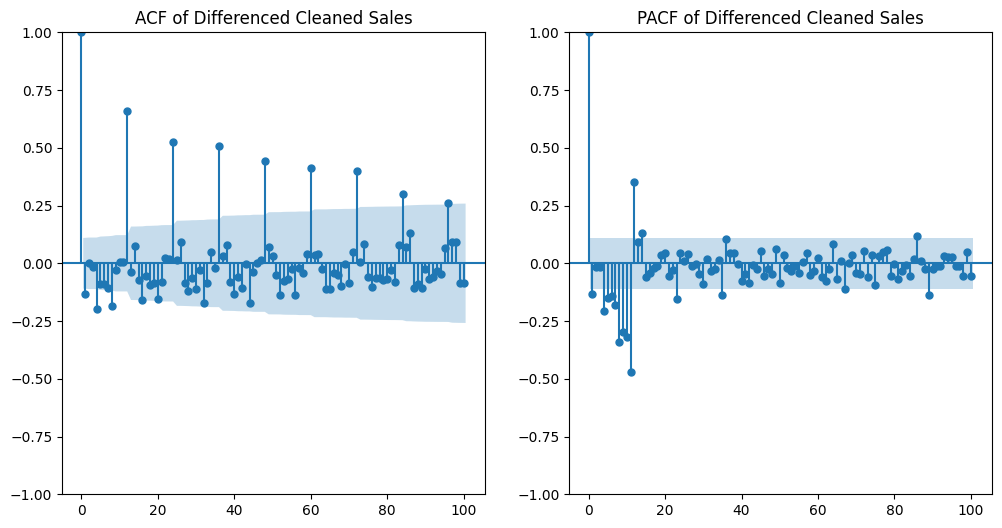

In [15]:
# Stationary test on the differenced database
adf_test_result = adfuller(diff_clean_sales_ts)
print("ADF Test Statistic:", adf_test_result[0])
print("p-value:", adf_test_result[1])

# ACF and PACF plots for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_clean_sales_ts, lags=100, ax=plt.gca())
plt.title('ACF of Differenced Cleaned Sales')
plt.subplot(122)
plot_pacf(diff_clean_sales_ts, lags=100, ax=plt.gca())
plt.title('PACF of Differenced Cleaned Sales')
plt.show()

In [16]:
from pmdarima.arima import auto_arima

In [17]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model_fit = auto_arima(clean_sales_ts, seasonal=True, m=12, max_p=5, max_q=5, max_P=5, max_Q=5, max_order=None, stepwise=True, trace=True)

# Print the best ARIMA model summary
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=76.759, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=389.789, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=157.500, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=249.263, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=387.809, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=70.497, Time=2.63 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=67.119, Time=3.38 sec
 ARIMA(2,1,2)(3,0,2)[12] intercept   : AIC=69.302, Time=5.94 sec
 ARIMA(2,1,2)(2,0,3)[12] intercept   : AIC=68.689, Time=5.10 sec
 ARIMA(2,1,2)(1,0,3)[12] intercept   : AIC=70.642, Time=4.99 sec
 ARIMA(2,1,2)(3,0,1)[12] intercept   : AIC=70.469, Time

In [18]:
# Print the best ARIMA model summary
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  321
Model:             SARIMAX(1, 1, 2)x(2, 0, [1], 12)   Log Likelihood                 -23.623
Date:                              Tue, 19 Dec 2023   AIC                             63.246
Time:                                      08:48:00   BIC                             93.393
Sample:                                  01-01-1994   HQIC                            75.284
                                       - 09-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.324e-07   8.35e-05     -0.004      0.997      -0.000       0.000
ar.L1          0.62

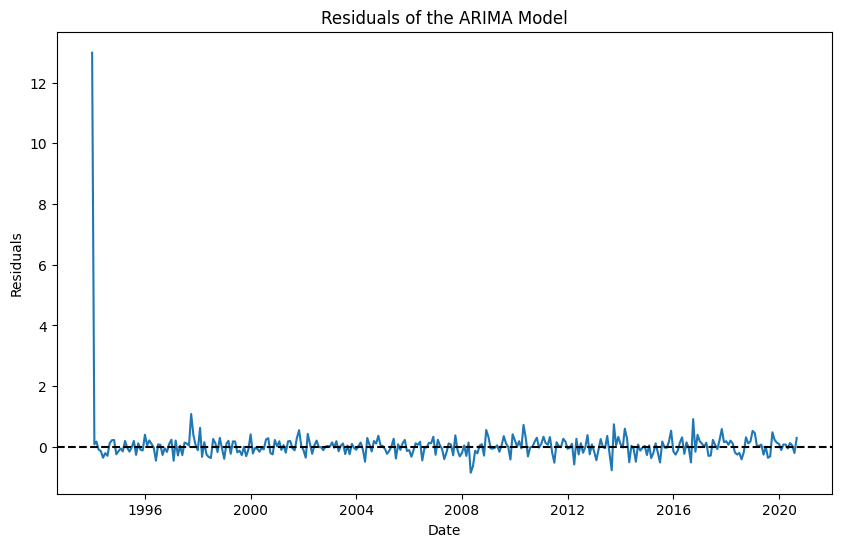

In [19]:
# Adequacy tests of residuals
residuals = model_fit.resid()
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of the ARIMA Model')
plt.axhline(0, color='black', linestyle='--')
plt.show()

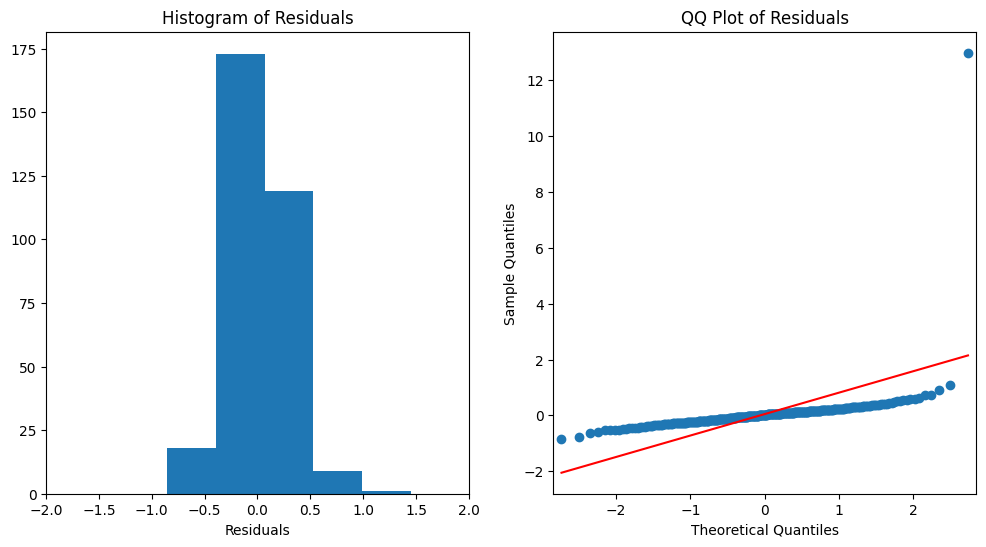

In [20]:
import statsmodels.api as sm

# Normality test of residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.xlim(-2, 2)
plt.title('Histogram of Residuals')

plt.subplot(122)
sm.qqplot(residuals, line='s', ax=plt.gca())  # Use sm.qqplot to create the QQ plot
plt.title('QQ Plot of Residuals')

plt.show()

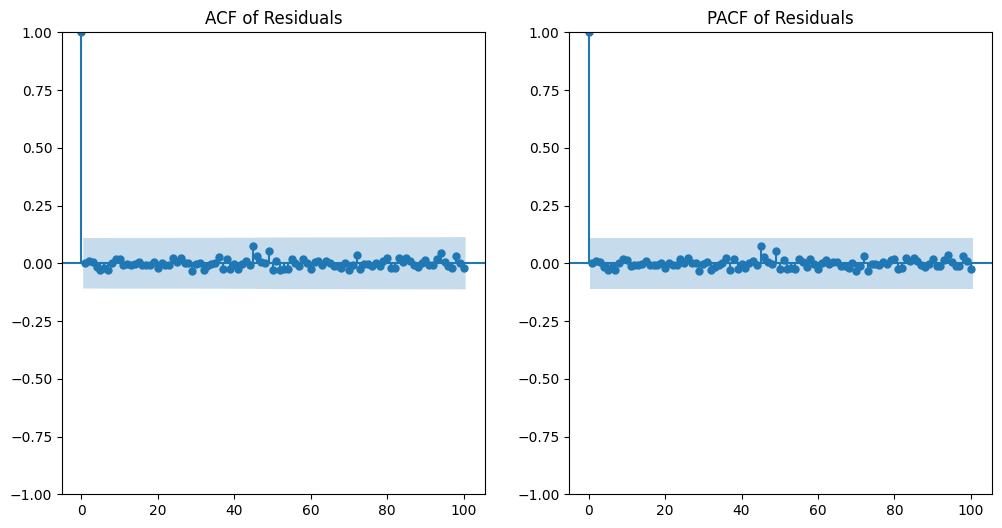

In [21]:
# White noise test of residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=100, ax=plt.gca())
plt.title('ACF of Residuals')
plt.subplot(122)
plot_pacf(residuals, lags=100, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()

In [22]:
import statsmodels.api as sm

# Create and fit the modified ARIMA model
modified_model = sm.tsa.SARIMAX(clean_sales_ts, order=(1, 1, 1), seasonal_order=(2, 0, 1, 12))
modified_model = modified_model.fit()

# Print the summary of the modified ARIMA model
print(modified_model.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36011D-01    |proj g|=  1.25261D+00

At iterate    5    f=  1.63413D-01    |proj g|=  4.38914D-02

At iterate   10    f=  1.13366D-01    |proj g|=  7.80301D-02

At iterate   15    f=  9.30699D-02    |proj g|=  4.80641D-02

At iterate   20    f=  8.45055D-02    |proj g|=  7.98163D-02

At iterate   25    f=  8.41026D-02    |proj g|=  7.45760D-03

At iterate   30    f=  7.88467D-02    |proj g|=  3.74412D-03

At iterate   35    f=  7.81366D-02    |proj g|=  8.86456D-04

At iterate   40    f=  7.81344D-02    |proj g|=  1.29324D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

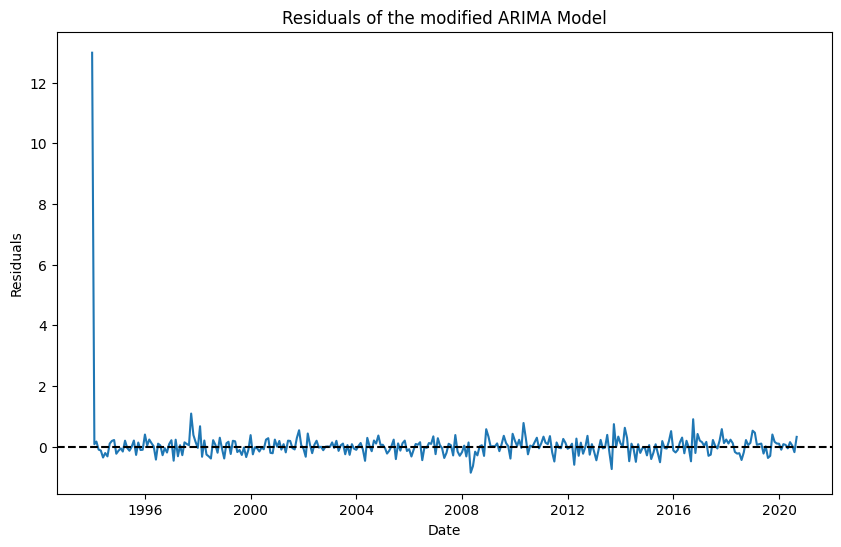

In [23]:
# Adequacy tests of residuals
# Extract the residuals
residuals2 = modified_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of the modified ARIMA Model')
plt.axhline(0, color='black', linestyle='--')
plt.show()

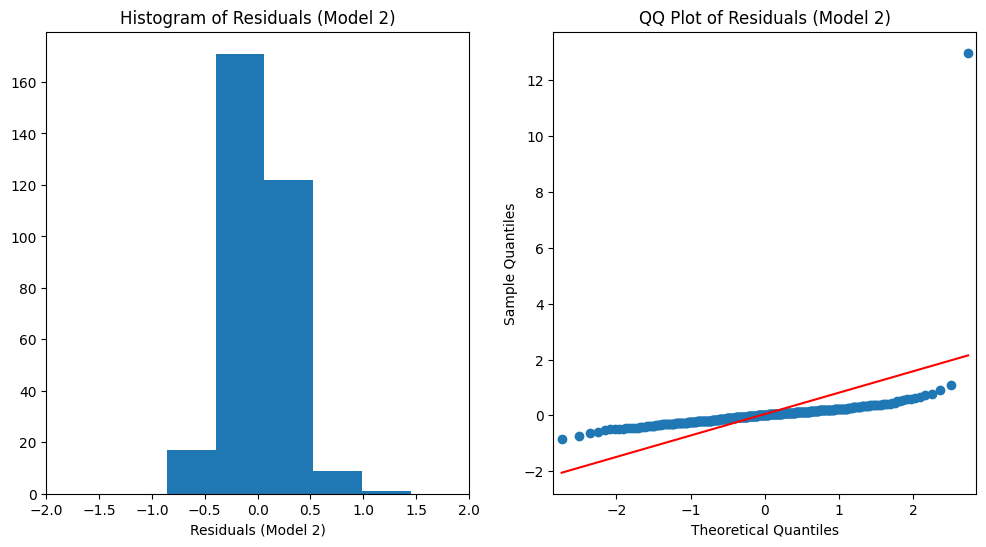

In [24]:
# Normality test of residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(residuals2, bins=30)
plt.xlabel('Residuals (Model 2)')
plt.xlim(-2, 2)
plt.title('Histogram of Residuals (Model 2)')

plt.subplot(122)
sm.qqplot(residuals2, line='s', ax=plt.gca())  # Use sm.qqplot to create the QQ plot
plt.title('QQ Plot of Residuals (Model 2)')

plt.show()

In [25]:
# Jarque-Bera test of residuals for the second model
jb_test_result = jarque_bera(residuals2)
print("Jarque-Bera Test Statistic (Model 2):", jb_test_result[0])
print("p-value (Model 2):", jb_test_result[1])

Jarque-Bera Test Statistic (Model 2): 837967.4103749361
p-value (Model 2): 0.0


In [26]:
# Predict the next 30 days of sales
forecast_steps = 30  # Number of steps (days) to forecast
forecast = modified_model.get_forecast(steps=forecast_steps)

# Extract the forecasted values and associated confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Print the forecasted values and confidence intervals
print("Forecasted Values:")
print(forecast_values)

# Print the confidence intervals (optional)
print("Confidence Intervals:")
print(forecast_conf_int)

Forecasted Values:
2020-10-01    13.346595
2020-11-01    13.258403
2020-12-01    13.462318
2021-01-01    13.303757
2021-02-01    13.107556
2021-03-01    13.198520
2021-04-01    13.109887
2021-05-01    12.606350
2021-06-01    12.055775
2021-07-01    12.087559
2021-08-01    11.952659
2021-09-01    11.903401
2021-10-01    13.358272
2021-11-01    13.296755
2021-12-01    13.509932
2022-01-01    13.349422
2022-02-01    13.176151
2022-03-01    13.260467
2022-04-01    13.173171
2022-05-01    12.690859
2022-06-01    12.139725
2022-07-01    12.173038
2022-08-01    12.073602
2022-09-01    11.982894
2022-10-01    13.412816
2022-11-01    13.357149
2022-12-01    13.569029
2023-01-01    13.410433
2023-02-01    13.243899
2023-03-01    13.325779
Freq: MS, Name: predicted_mean, dtype: float64
Confidence Intervals:
              lower y    upper y
2020-10-01  12.849394  13.843796
2020-11-01  12.710998  13.805808
2020-12-01  12.899137  14.025499
2021-01-01  12.732190  13.875324
2021-02-01  12.529704  13.6

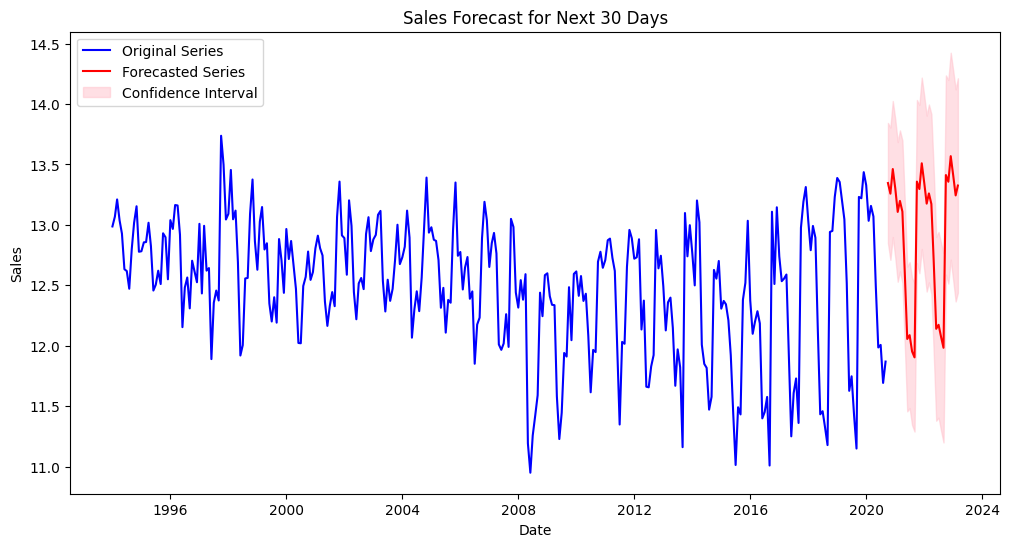

In [27]:
import matplotlib.pyplot as plt

# Plot the initial time series
plt.figure(figsize=(12, 6))
plt.plot(clean_sales_ts, label='Original Series', color='blue')

# Plot the forecasts
plt.plot(forecast_values, label='Forecasted Series', color='red')

# Fill the area between upper and lower confidence intervals (optional)
plt.fill_between(
    forecast_conf_int.index,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='pink',
    alpha=0.5,
    label='Confidence Interval',
)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for Next 30 Days')
plt.legend(loc='upper left')

# Show the plot
plt.show()